
# 🚴 AdventureWorks Sales Analysis
* **Author:** Ali Akyel
* **Date:** 2024-10-25
* **Goal:** Analyze sales, customer, and product data to identify key business insights and strategic opportunities.

---

### 📋 Table of Contents
* [1. Product Portfolio (Category Count)](#q1)
* [2. Revenue by Category](#q2)
* [3. Sales Trends over Time](#q3)
* [4. Sales and Order Count per Year](#q4)
* [5. Top Customers](#q5)
* [6. Regional Sales & Customers](#q6)
* [7. Average Order Value (Store vs. Individual)](#q7)
* [8. VG Option: Product Profitability Matrix](#q8)

---


## Setup (Code)
Imports
Connection
server = 'localhost'
database = 'AdventureWorks2022'



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus


server = '.\\SQLEXPRESS'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")


connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver}&trusted_connection=yes&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("✅ Connection to SQL Server successful!")
except Exception as e:
    print("❌ Could not connect to the database.", e)

C:\Users\AliAkyel\AppData\Local\Temp\ipykernel_22596\1000407399.py:23: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


✅ Connection to SQL Server successful!


### ... connection string & engine

In [2]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    

<a id="q1"></a>

## 1. How many products are in each category?

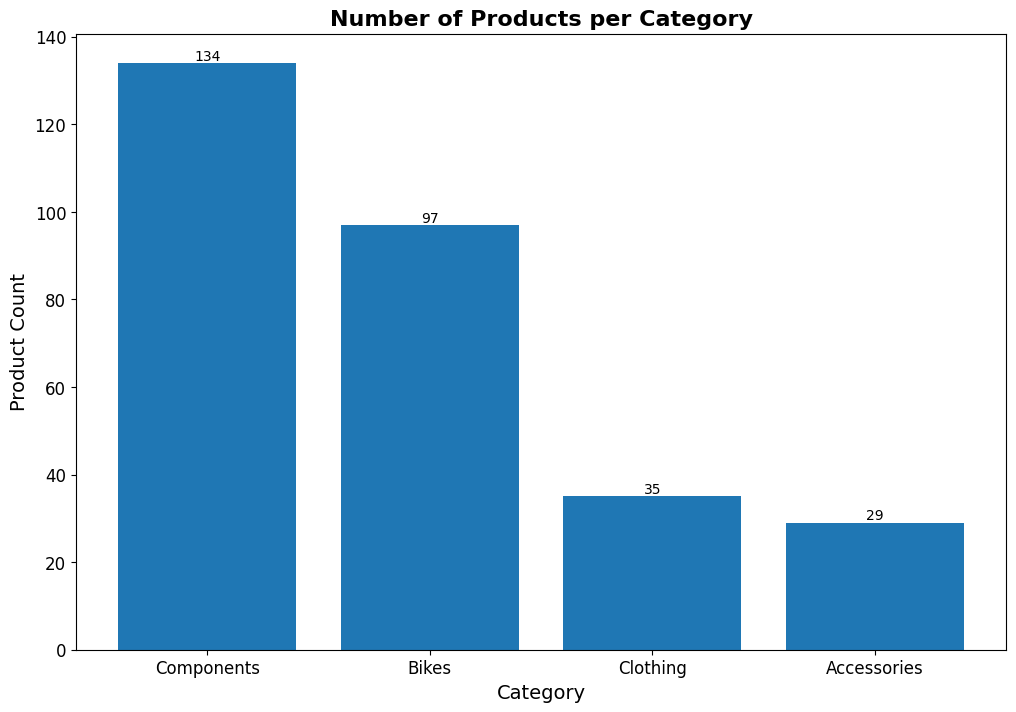

Data Overview:


,CategoryName,ProductCount
0,Components,134
1,Bikes,97
2,Clothing,35
3,Accessories,29


In [3]:
with open('../data/query1.sql', 'r') as file:
    query_q1 = file.read()

df_q1 = pd.read_sql(query_q1, engine)

plt.figure(figsize=(12, 8))
bars = plt.bar(df_q1['CategoryName'], df_q1['ProductCount'], color='#1f77b4')

plt.title('Number of Products per Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Product Count', fontsize=14)
plt.bar_label(bars)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print("Data Overview:")
display(df_q1)

### 📊 Analysis: Product Portfolio Structure

**Key Findings:**
* **Components** has the highest number of products, **134**. This indicates that Adventure Works provides a broad range of spare parts for bikes. 
* **Bikes** follow with **97** models, which shows that Adventure Works primarily sells bikes and spare parts for the bikes. 
* **Clothing** (35) and **Accessories** (29) have significantly fewer distinct products, serving as cross-sell opportunities rather than core offerings.


<a id="q2"></a>

## 2. Revenue by Category

**Business Question:** Which product categories generate the most revenue?


**Goal:** Identify the primary drivers of cash flow for the business.

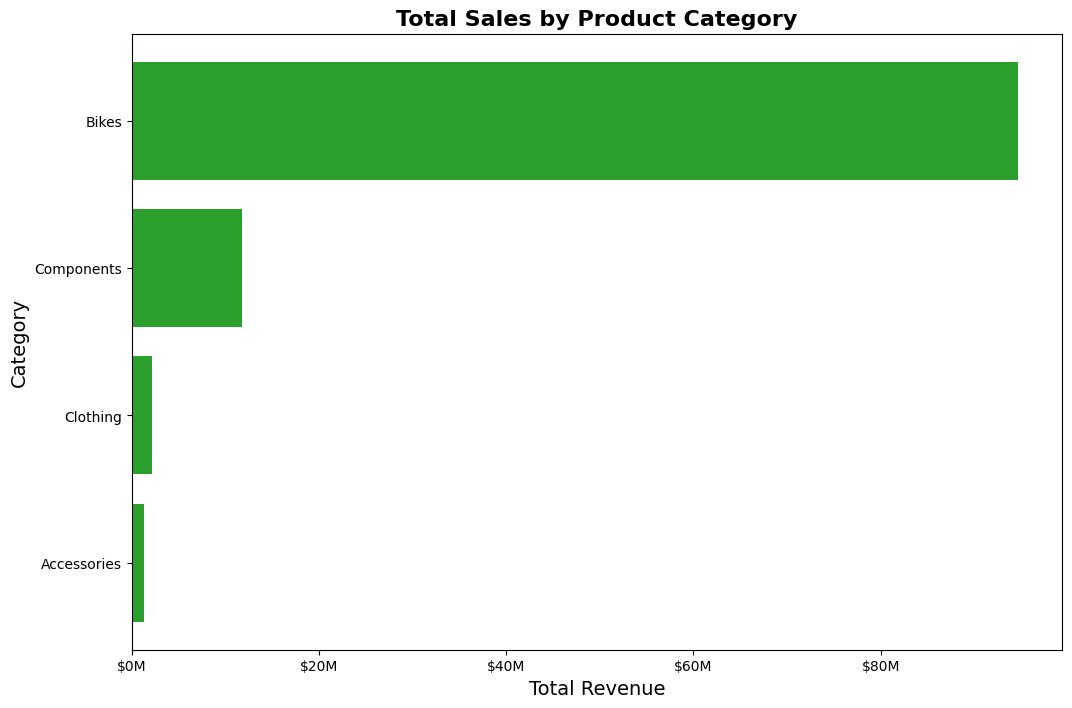

Data Overview:


,CategoryName,TotalSales
0,Bikes,9.465117e+07
1,Components,1.180259e+07
2,Clothing,2.120543e+06
3,Accessories,1.272073e+06


In [4]:
with open('../data/query2.sql', 'r') as file:
    query_q2 = file.read()

df_q2 = pd.read_sql(query_q2, engine)

plt.figure(figsize=(12, 8))

bars = plt.barh(df_q2['CategoryName'], df_q2['TotalSales'], color='#2ca02c')

plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.gca().invert_yaxis()


plt.ticklabel_format(style='plain', axis='x')

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1_000_000)))

plt.show()

print("Data Overview:")
display(df_q2)

### 💡 Insights & Analysis

**Key Findings:**
* **The Powerhouse:** **Bikes** are the overwhelming revenue driver, generating over **$94 Million**. This accounts for nearly **97%** of total company sales.
* **The Disconnect:** Comparing this to Question 1, while **Components** had the most *products* (134), they generate very little *revenue*.
* **Strategic Implication:** The company effectively spends its manufacturing effort (high component count) to support the sales of one category (Bikes). The "Pareto Principle" (80/20 rule) is extreme here: one category carries the entire business.

## 3. Sales Trends over Time

**Business Question:** How has revenue changed in time?

**Goal:** Identify growth patterns and seasonal peaks to optimize inventory planning.

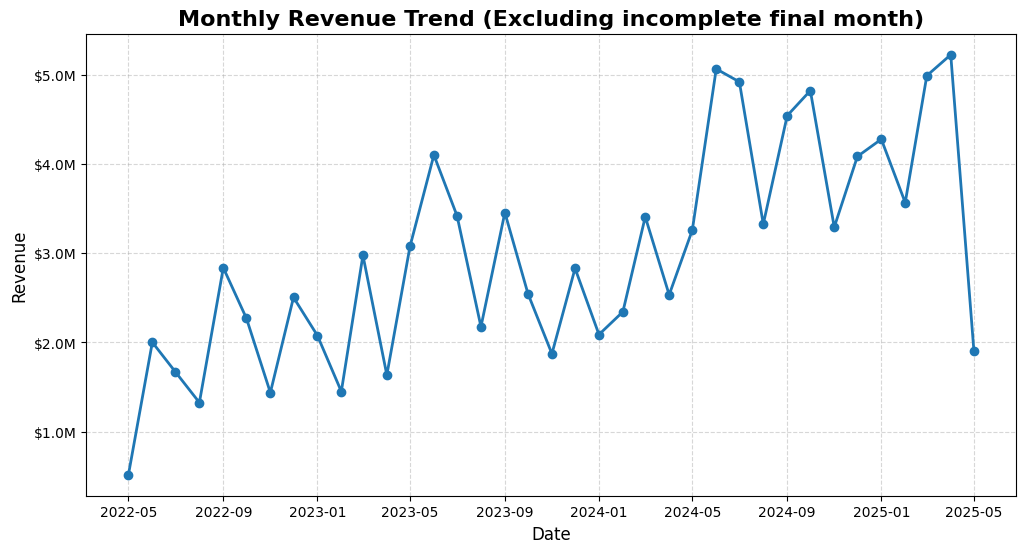

📈 Months with Positive Growth (Upside Trend):


,OrderDate,TotalSales,Growth
1,2022-06-01,"$2,001,279","+$1,483,542"
4,2022-09-01,"$2,836,410","+$1,510,272"
7,2022-12-01,"$2,504,196","+$1,066,854"
10,2023-03-01,"$2,975,748","+$1,525,865"
12,2023-05-01,"$3,074,603","+$1,440,002"
13,2023-06-01,"$4,099,354","+$1,024,752"
16,2023-09-01,"$3,454,152","+$1,278,515"
19,2023-12-01,"$2,829,405","+$956,703"
21,2024-02-01,"$2,343,260","+$255,388"
22,2024-03-01,"$3,407,037","+$1,063,777"


In [5]:
with open('../data/query3.sql', 'r') as file:
    query_q3 = file.read()

df_q3 = pd.read_sql(query_q3, engine)
df_q3['OrderDate'] = pd.to_datetime(df_q3['OrderDate'])

df_q3 = df_q3.iloc[:-1] 

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_q3['OrderDate'], df_q3['TotalSales'], marker='o', linestyle='-', color='#1f77b4', linewidth=2)

ax.set_title('Monthly Revenue Trend (Excluding incomplete final month)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)


def currency_formatter(x, pos):
    if x >= 1_000_000:
        return '${:,.1f}M'.format(x * 1e-6)
    return '${:,.0f}K'.format(x * 1e-3)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))

plt.show()

df_q3['Growth'] = df_q3['TotalSales'].diff()

upside_months = df_q3[df_q3['Growth'] > 0].copy()

display_table = upside_months.copy()
display_table['TotalSales'] = display_table['TotalSales'].map('${:,.0f}'.format)
display_table['Growth'] = display_table['Growth'].map('+${:,.0f}'.format) 

print("📈 Months with Positive Growth (Upside Trend):")
display(display_table[['OrderDate', 'TotalSales', 'Growth']])

### 💡 Insights & Analysis:

**1. The "Quarter-End" Phenomenon:**
A clear pattern emerges at the end of financial quarters. There are consistent growth spikes in **March, June, September, and December**. This strongly suggests that sales performance is driven by **quarterly targets and quotas**, where sales teams push to close deals before the period ends.

**2. Seasonal Anchors:**
* **December:** Consistently high performance correlates with the global holiday gift-giving season.
* **Mid-Year (June):** aligns with the start of the summer cycling season in the Northern Hemisphere.

**3. Anomalies & Action Items:**
Spikes in off-season months like **February and October** are irregularities.
* *Hypothesis:* These could be driven by specific marketing campaigns, clearance sales, or new model launches (e.g., announcing next year's bike models in autumn).
* *Recommendation:* Investigate historical marketing calendars to correlate these spikes with specific promotional events.


## 4. Sales and Order Count per Year

**Business Question:** How do total sales and order volume compare year over year?

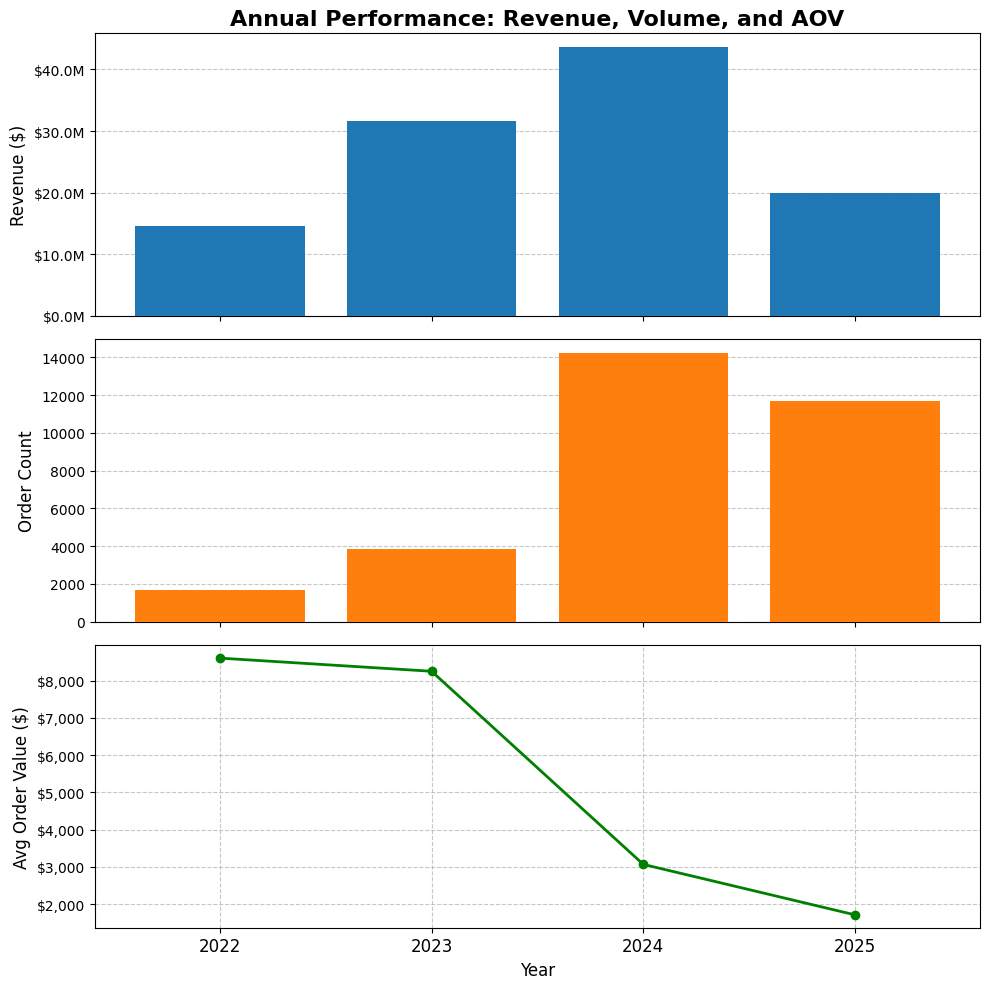

Annual Performance Summary:


,OrderYear,TotalSales,OrderCount,AOV
0,2022,"$14,561,051.59",1692,"$8,605.82"
1,2023,"$31,604,921.95",3830,"$8,251.94"
2,2024,"$43,671,889.50",14244,"$3,065.98"
3,2025,"$20,008,518.36",11699,"$1,710.28"


In [6]:
# --- QUESTION 4: Sales, Order Count & AOV per Year ---

# 1. READ SQL
with open('../data/query4.sql', 'r') as file:
    query_q4 = file.read()

# 2. GET DATA
df_q4 = pd.read_sql(query_q4, engine)

# --- NEW: Calculate Average Order Value (AOV) ---
df_q4['AOV'] = df_q4['TotalSales'] / df_q4['OrderCount']

# 3. VISUALIZE (3 Subplots)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Chart 1: Revenue (Top)
ax1.bar(df_q4['OrderYear'], df_q4['TotalSales'], color='#1f77b4', zorder=3)
ax1.set_title('Annual Performance: Revenue, Volume, and AOV', fontsize=16, fontweight='bold')
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Format Revenue ($M)
import matplotlib.ticker as mticker
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.1f}M'.format(x/1_000_000)))

# Chart 2: Order Count (Middle)
ax2.bar(df_q4['OrderYear'], df_q4['OrderCount'], color='#ff7f0e', zorder=3)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Chart 3: Average Order Value (Bottom) - The New Metric
ax3.plot(df_q4['OrderYear'], df_q4['AOV'], marker='o', color='green', linewidth=2, zorder=3)
ax3.set_ylabel('Avg Order Value ($)', fontsize=12)
ax3.set_xlabel('Year', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.7)

# Format AOV Axis ($)
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Ensure Years are integers
plt.xticks(df_q4['OrderYear'], fontsize=12)

plt.tight_layout()
plt.show()

# 4. DATA OVERVIEW
print("Annual Performance Summary:")

formatted_table = df_q4.style.format({
    'TotalSales': '${:,.2f}',
    'AOV': '${:,.2f}'
})

display(formatted_table)

### 💡 Insights & Analysis

**Key Findings:**
* **Peak Performance:** The years **2022 and 2023** represent the company's peak performance, showing the highest combined total revenue and order volume.
* **Concerning Trend (AOV Drop):** Starting in **2024**, and continuing into **2025**, there is a significant decrease in **Average Order Value (AOV)**. The average value of a customer's basket has effectively been cut in half compared to the 2022-2023 peaks.
    * *Hypothesis:* This suggests a shift in product mix—we are likely selling more low-cost accessories or components rather than high-ticket items like Bikes.
* **Data Note (2025):** Data for **2025** is partial (covering only the first half of the year). While this explains the lower *Total Sales*, the low *AOV* remains a valid concern that requires investigation into pricing or product strategy.

## 5. Top 10 Products

**Business Question:** Which 10 products generate the most sales?

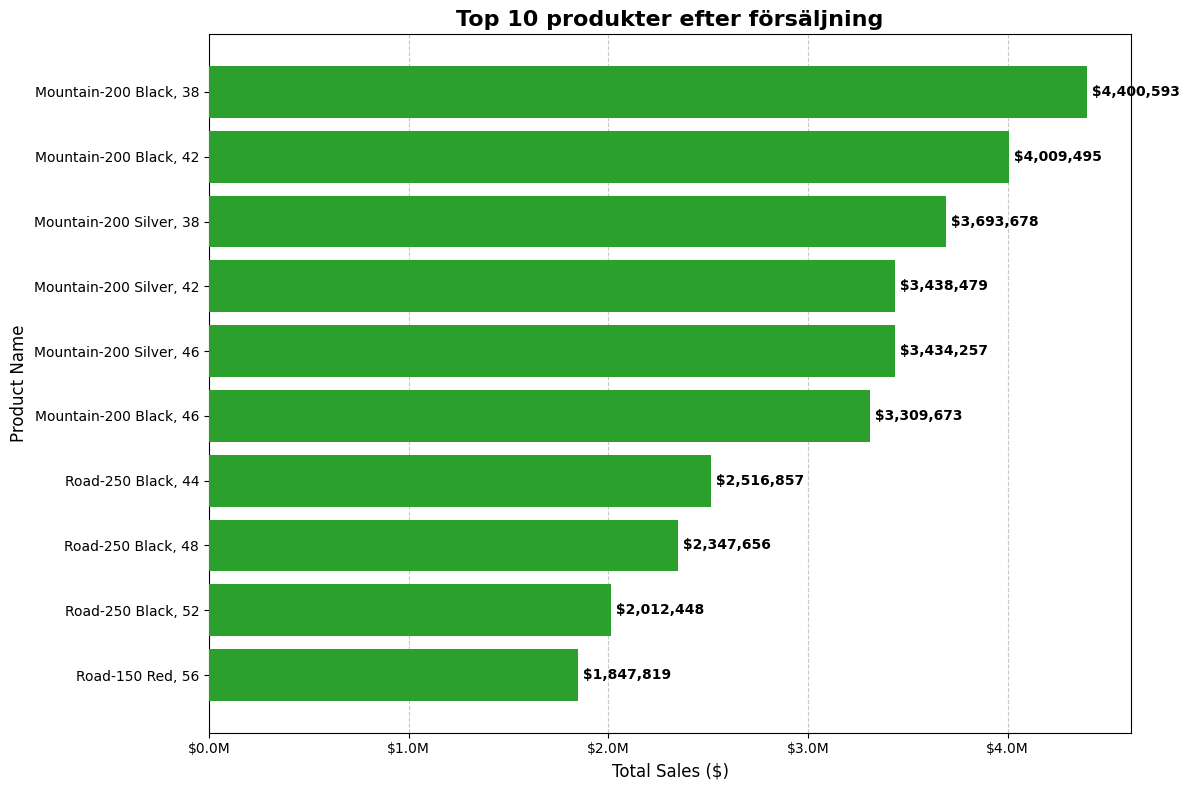

Top 10 Product List:


,ProductName,TotalSales
0,"Mountain-200 Black, 38","$4,400,593"
1,"Mountain-200 Black, 42","$4,009,495"
2,"Mountain-200 Silver, 38","$3,693,678"
3,"Mountain-200 Silver, 42","$3,438,479"
4,"Mountain-200 Silver, 46","$3,434,257"
5,"Mountain-200 Black, 46","$3,309,673"
6,"Road-250 Black, 44","$2,516,857"
7,"Road-250 Black, 48","$2,347,656"
8,"Road-250 Black, 52","$2,012,448"
9,"Road-150 Red, 56","$1,847,819"


In [7]:
with open('../data/query5.sql', 'r') as file:
    query_q5 = file.read()

df_q5 = pd.read_sql(query_q5, engine)

df_q5_plot = df_q5.sort_values(by='TotalSales', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(df_q5_plot['ProductName'], df_q5_plot['TotalSales'], color='#2ca02c', zorder=3)

ax.set_title('Top 10 produkter efter försäljning', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Sales ($)', fontsize=12)
ax.set_ylabel('Product Name', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)



ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f' ${width:,.0f}', 
            va='center', ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Top 10 Product List:")
display(df_q5.style.format({'TotalSales': '${:,.0f}'}))

### 💡 Insights & Analysis

**Key Findings:**

**Top Performer:** The Mountain-200 is the standout product, generating $22M in revenue across its various sizes.

**Category Dominance:** The Top 10 list consists entirely of bicycles, specifically the Mountain-200 and Road-250 series. This confirms that revenue is driven by high-value bike sales rather than lower-cost components or apparel.

**Revenue Concentration:** There is a sharp drop-off after the top performer; the Mountain-200 ($22M) generates more than triple the revenue of the second most popular model, the Road-250 ($7M).

## 6. Sales and Number of Customers by Region

**Business Question:** How do sales differ between different regions, and how many unique customers does each region have?

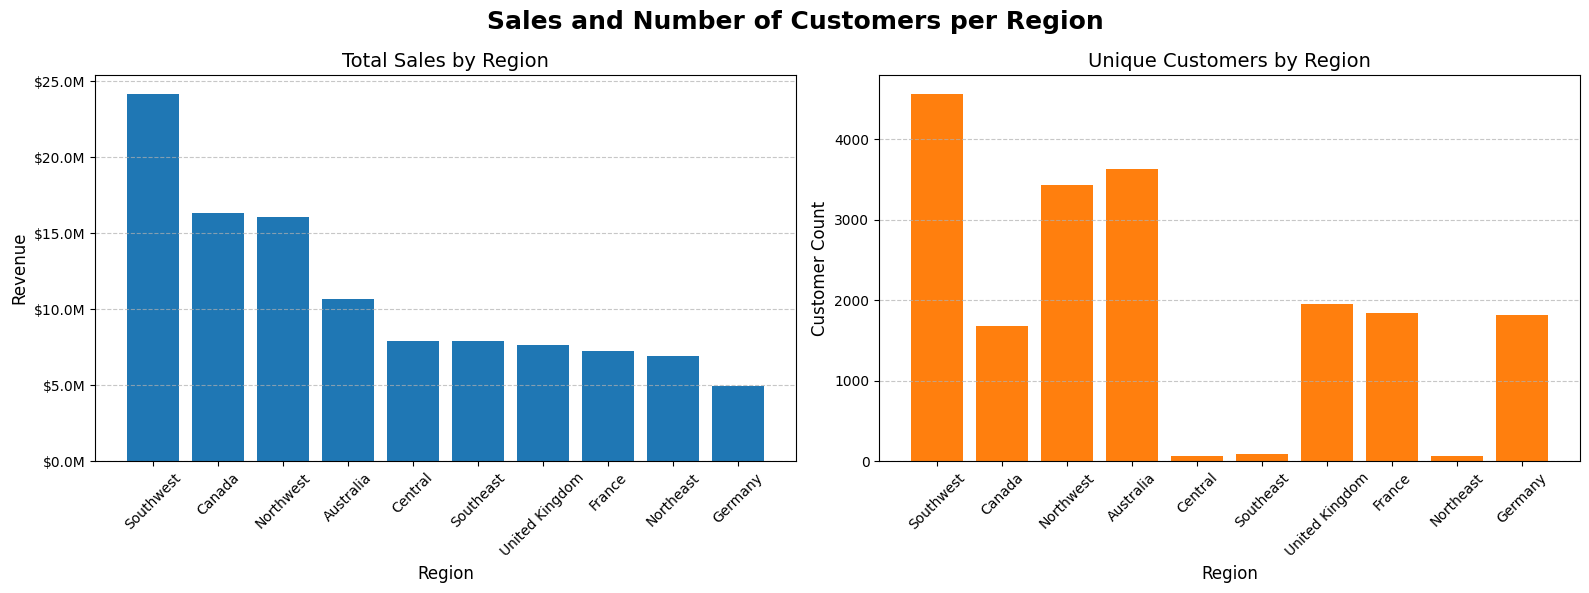

Regional Performance Summary:


,RegionName,TotalSales,UniqueCustomers,AvgSpendPerCustomer
0,Southwest,"$24,184,609.60","4,565","$5,297.83"
1,Canada,"$16,355,770.46","1,677","$9,752.99"
2,Northwest,"$16,084,942.55","3,428","$4,692.22"
3,Australia,"$10,655,335.96","3,625","$2,939.40"
4,Central,"$7,909,009.01",69,"$114,623.32"
5,Southeast,"$7,879,655.07",91,"$86,589.62"
6,United Kingdom,"$7,670,721.04","1,951","$3,931.69"
7,France,"$7,251,555.65","1,844","$3,932.51"
8,Northeast,"$6,939,374.48",57,"$121,743.41"
9,Germany,"$4,915,407.60","1,812","$2,712.70"


In [8]:
# --- QUESTION 6: Sales & Customers by Region ---

# 1. READ SQL
with open('../data/query6.sql', 'r') as file:
    query_q6 = file.read()

# 2. GET DATA
df_q6 = pd.read_sql(query_q6, engine)

# --- ADD THIS CALCULATION ---
df_q6['AvgSpendPerCustomer'] = df_q6['TotalSales'] / df_q6['UniqueCustomers']

# 3. VISUALIZE (Subplots for different scales)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Total Sales ---
ax1.bar(df_q6['RegionName'], df_q6['TotalSales'], color='#1f77b4')
ax1.set_title('Total Sales by Region', fontsize=14)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.tick_params(axis='x', rotation=45) # Rotate labels for readability
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)


ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.1f}M'.format(x/1_000_000)))

# --- Chart 2: Unique Customers ---
ax2.bar(df_q6['RegionName'], df_q6['UniqueCustomers'], color='#ff7f0e')
ax2.set_title('Unique Customers by Region', fontsize=14)
ax2.set_xlabel('Region', fontsize=12)
ax2.set_ylabel('Customer Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Sales and Number of Customers per Region', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("Regional Performance Summary:")
formatted_table = df_q6.style.format({
    'TotalSales': '${:,.2f}',
    'UniqueCustomers': '{:,.0f}',
    'AvgSpendPerCustomer': '${:,.2f}'
})
display(formatted_table)

Insight Requirements:

- Which region is the strongest/weakest? Compare: Does the region with the highest sales also have the most customers, or does it have fewer customers with higher order values? What does that mean?

### 💡 Insights & Analysis

* **Market Leader:** The Southwest region leads in both total sales and customer acquisition, maintaining the highest count of unique customers.

* **Sales vs. Volume:** While Germany reports the lowest total sales, its unique customer base is not the smallest, suggesting a higher volume of low-value transactions.

* **B2B Indicators:** The Central, Southeast, and Northeast regions show a distinct pattern: they maintain strong sales (approx. $7M each) despite significantly lower customer counts. This high revenue-per-customer ratio indicates a concentration of B2B or wholesale activity in these markets.

## 7. Average Order Value by Region and Customer Type

**Business Question:** Which regions have the highest/lowest average order value, and does it differ between individual and corporate customers?

Insight Requirements:

- Compare Store vs. Individual - which group has higher order value? Does it differ between regions? What can explain the differences? Which region + customer type combination has the highest order value?

<Figure size 1400x700 with 0 Axes>

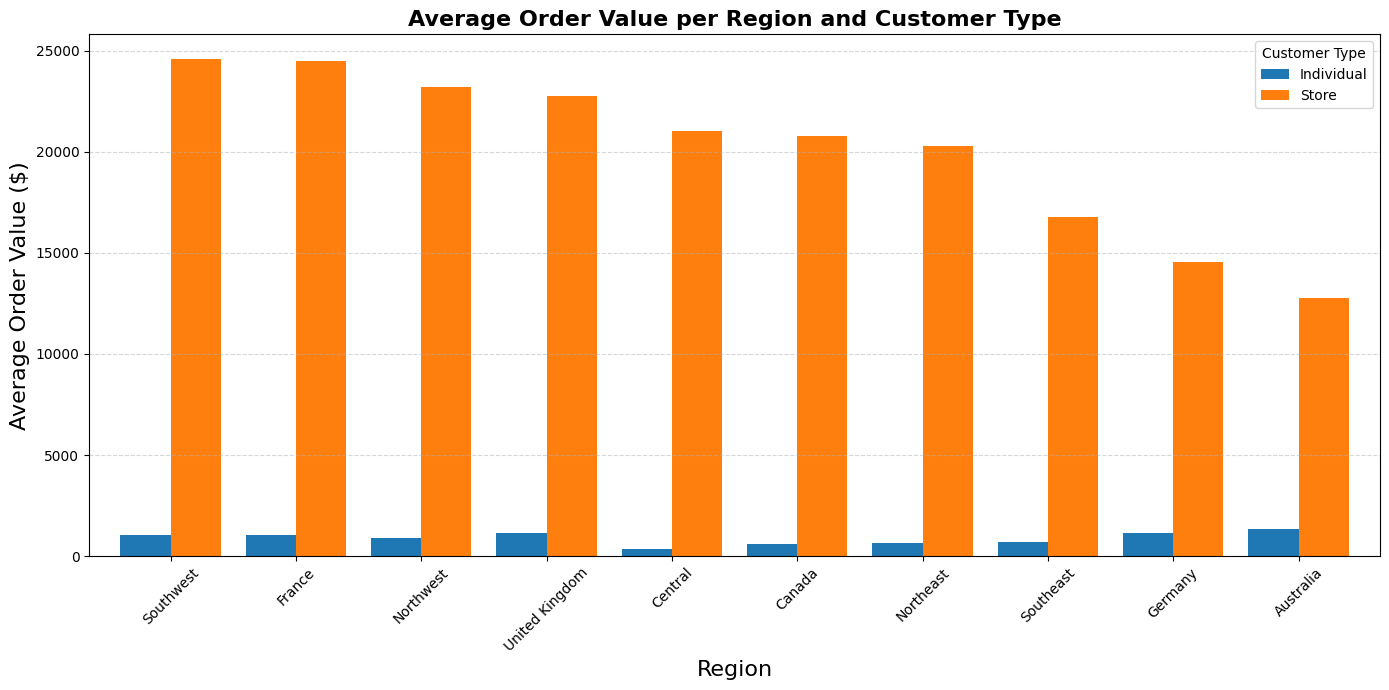

Average Order Value Comparison:


CustomerType,Individual,Store
RegionName,,
Southwest,"$1,044.79","$24,589.16"
France,"$1,064.42","$24,508.18"
Northwest,$899.42,"$23,199.77"
United Kingdom,"$1,119.01","$22,760.69"
Central,$333.43,"$21,026.62"
Canada,$586.03,"$20,777.35"
Northeast,$653.25,"$20,271.47"
Southeast,$719.93,"$16,774.87"
Germany,"$1,165.18","$14,540.25"


In [9]:
# --- QUESTION 7: Average Order Value (Store vs Individual) ---

# 1. READ SQL
with open('../data/query7.sql', 'r') as file:
    query_q7 = file.read()

# 2. GET DATA
df_q7 = pd.read_sql(query_q7, engine)

# 3. TRANSFORM (PIVOT)
# We reshape the data so "Individual" and "Store" become their own columns
# This makes plotting a grouped bar chart extremely easy
df_pivot = df_q7.pivot(index='RegionName', columns='CustomerType', values='AvgOrderValue')

# Sort by 'Store' value (usually the highest) so the chart looks organized
df_pivot = df_pivot.sort_values(by='Store', ascending=False)



# 4. VISUALIZE
plt.figure(figsize=(14, 7))

# Pandas makes grouped bar charts very easy with the .plot() function
# kind='bar' creates vertical bars, distinct by the columns we pivoted
df_pivot.plot(kind='bar', figsize=(14, 7), color=['#1f77b4', '#ff7f0e'], width=0.8)


plt.title('Average Order Value per Region and Customer Type', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Average Order Value ($)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Customer Type')

# Format Y-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# 5. INSIGHTS
print("Average Order Value Comparison:")
# Format money with 2 decimals for the table
display(df_pivot.style.format('${:,.2f}'))

### 💡 Insights & Analysis

**Key Findings:**
* **Store vs. Individual:** The massive gap between customer types is structural. "Store" customers are B2B retailers purchasing bulk inventory for resale (Wholesale), whereas "Individual" customers purchase single units for personal use (Retail).
* **Regional Differences:** There is a notable disparity between regions regarding average order value. **France** and the **Southwest** region show the strongest numbers. Meanwhile, the **Southeast**, **Germany**, and **Australia** lag behind, with average order values $7K–$10K lower than the top performers. The significant AOV gap between regions suggests a difference in partner scale. France and Southwest likely rely on large-scale distributors or major retail chains placing big orders. In contrast, Germany and Australia likely consist of smaller, local bike shops placing smaller orders.

## Deep Dive: Product Portfolio Analysis

**Business Questions:** 
* Which products are "winners" (high sales, high margin)?
* Which are "losers" (low sales or negative margin)?
* Which products should we stop selling? Which ones should we focus more on?
* Are there products with high volume but low revenue?

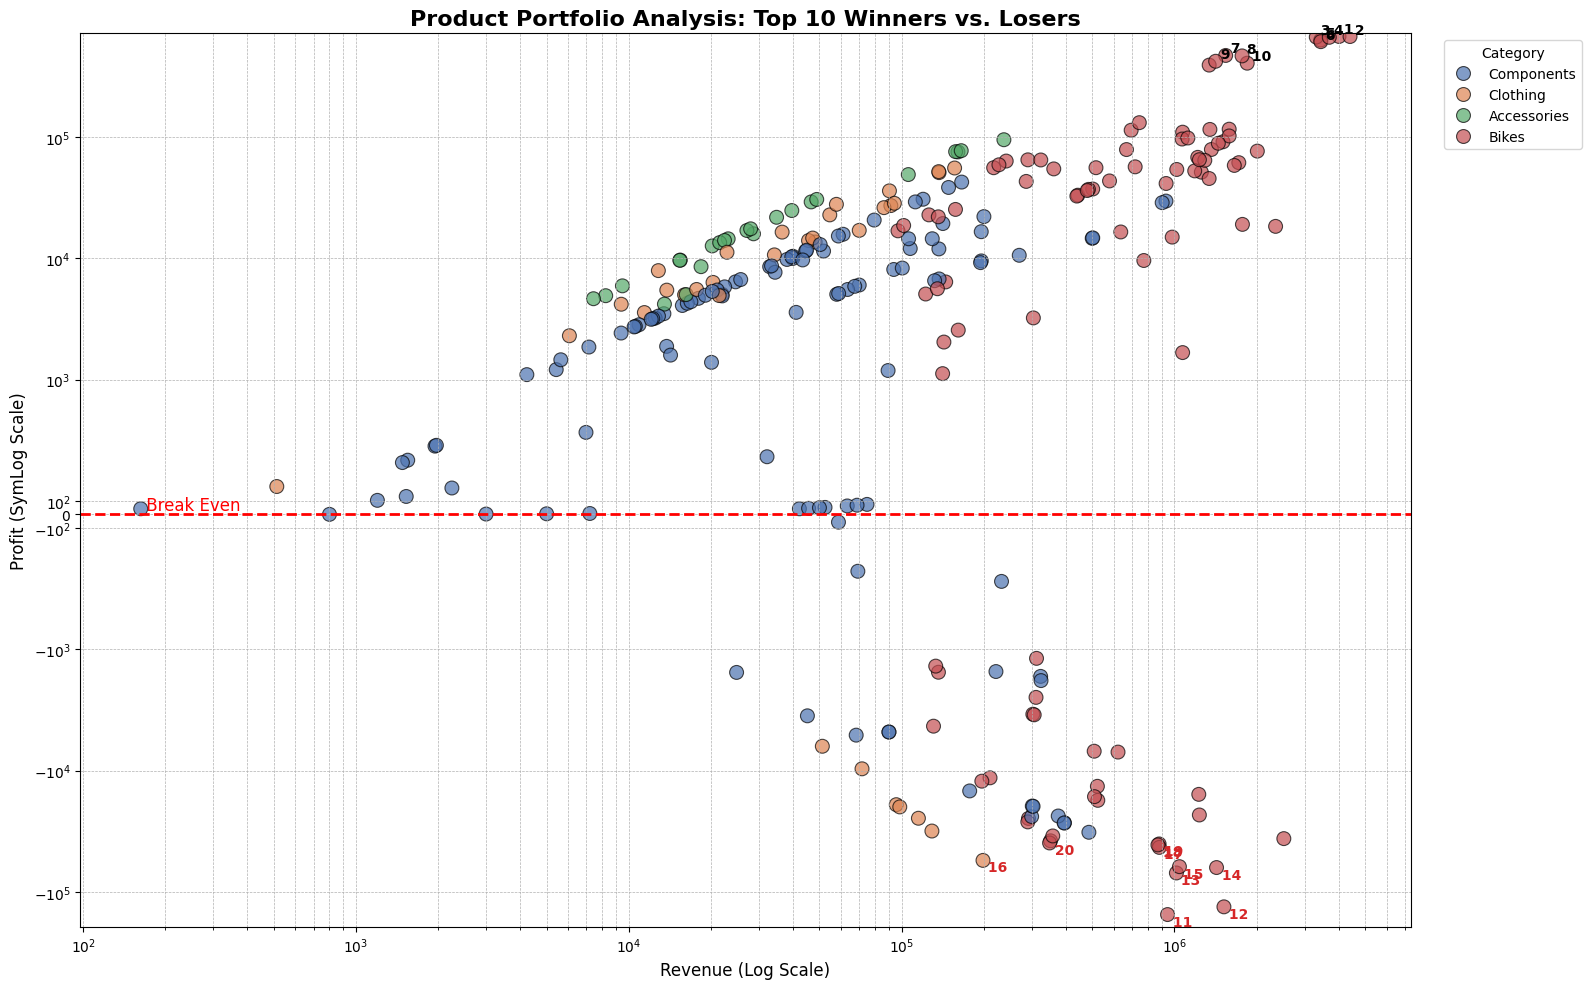

🏆 TOP 10 Winners (Highest Profit)


,MapID,ProductName,CategoryName,TotalProfit
39,1,"Mountain-200 Black, 42",Bikes,"$674,217"
218,2,"Mountain-200 Black, 38",Bikes,"$673,444"
70,3,"Mountain-200 Black, 46",Bikes,"$666,741"
249,4,"Mountain-200 Silver, 38",Bikes,"$663,785"
40,5,"Mountain-200 Silver, 46",Bikes,"$629,644"
183,6,"Mountain-200 Silver, 42",Bikes,"$611,085"
166,7,"Road-150 Red, 48",Bikes,"$470,355"
226,8,"Road-150 Red, 62",Bikes,"$466,320"
248,9,"Road-150 Red, 52",Bikes,"$421,111"
213,10,"Road-150 Red, 56",Bikes,"$406,079"



⚠️ TOP 10 Losers (Lowest Profit)


,MapID,ProductName,CategoryName,TotalProfit
229,11,"Road-650 Red, 44",Bikes,"$-153,696"
22,12,"Touring-1000 Yellow, 60",Bikes,"$-132,746"
3,13,"Road-650 Red, 60",Bikes,"$-69,800"
19,14,"Touring-1000 Yellow, 46",Bikes,"$-62,975"
240,15,"Road-650 Black, 52",Bikes,"$-61,914"
77,16,"Long-Sleeve Logo Jersey, L",Clothing,"$-54,986"
211,17,"Road-650 Red, 62",Bikes,"$-42,968"
233,18,"Road-650 Black, 58",Bikes,"$-40,995"
196,19,"Road-650 Red, 48",Bikes,"$-40,235"
159,20,"Touring-3000 Blue, 50",Bikes,"$-39,494"


In [10]:
# --- OPTION B: Product Portfolio (Refined Visuals) ---

# 1. PREPARE DATA
with open('../data/query_b1.sql', 'r') as file:
    query_b1 = file.read()
df_b1 = pd.read_sql(query_b1, engine)

# Identify Top 10 Winners and Bottom 10 Losers
top_10 = df_b1.nlargest(10, 'TotalProfit').copy()
bottom_10 = df_b1.nsmallest(10, 'TotalProfit').copy()

# Assign Map IDs
top_10['MapID'] = range(1, 11) 
bottom_10['MapID'] = range(11, 21)



plt.figure(figsize=(16, 10))

# A. Scatter Plot
sns.scatterplot(
    data=df_b1,
    x='TotalRevenue',
    y='TotalProfit',
    hue='CategoryName',
    s=100, # Made dots slightly bigger
    alpha=0.7,
    palette='deep',
    edgecolor='black'
)

# B. Scales & Lines
plt.xscale('log')
plt.yscale('symlog', linthresh=1000)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.text(df_b1['TotalRevenue'].min(), 0, ' Break Even', color='red', va='bottom', fontsize=12)

# C. Add Numbered Labels
# Winners (1-10)
for _, row in top_10.iterrows():
    plt.text(row['TotalRevenue'], row['TotalProfit'], f" {int(row['MapID'])}", 
             fontweight='bold', fontsize=10, color='black', va='bottom')

# Losers (11-20)
for _, row in bottom_10.iterrows():
    plt.text(row['TotalRevenue'], row['TotalProfit'], f" {int(row['MapID'])}", 
             fontweight='bold', fontsize=10, color='#d62728', va='top')

# D. Formatting - FIXING THE AXIS LABELS
plt.title('Product Portfolio Analysis: Top 10 Winners vs. Losers', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (Log Scale)', fontsize=12)
plt.ylabel('Profit (SymLog Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. DISPLAY TABLES (Replaces print with styled DataFrames)
print("🏆 TOP 10 Winners (Highest Profit)")
display(top_10[['MapID', 'ProductName', 'CategoryName', 'TotalProfit']].style.format({'TotalProfit': '${:,.0f}'}))

print("\n⚠️ TOP 10 Losers (Lowest Profit)")
display(bottom_10[['MapID', 'ProductName', 'CategoryName', 'TotalProfit']].style.format({'TotalProfit': '${:,.0f}'}))

### 💡 Insights & Analysis

**1. The "Winners" (High Profit Stars)**
* Bike models **Mountain-200** and **Road-150** are the absolute star of the portfolio. They generate the highest total profit, significantly outperforming other models.
* **Category Dominance:** The top 10 list contains only **Bikes**. This category has both high sales volume and healthy margins, making them the financial backbone of the company.

**2. The "Losers" (Profit Drains)**
* **Negative/Low Performance:** The bottom 10 list highlights products like **the bike models Road-650, Touring-1000, and Long-sleeve Logo Jersey from clothing category**. These items are generating losses and must be taken away from the portfolio.

**3. Strategic Recommendation**
* **Action Plan:** We should aggressively market the "Winners" to maximize our return on ad spend. Simultaneously, we must review the "Losers" for immediate deprecation. **Road-650** and **Touring-1000** requires immediate attention and probably should be removed from the catalog as soon as possible to free up inventory space and capital.

## Step 2: The Deep Dive (Pivot Table)

In [11]:
# --- OPTION B: Subcategory Profitability (Refined Table) ---

# 1. READ SQL
with open('../data/query_b1.sql', 'r') as file:
    query_b1 = file.read()

df_b1 = pd.read_sql(query_b1, engine)

# 2. PREPARE GROUPED DATA
# Group by Subcategory to see which types of products are winners/losers
df_sub = df_b1.groupby(['CategoryName', 'ProductSubcategoryName'])[['TotalProfit', 'TotalRevenue']].sum().reset_index()

# Calculate Profit Margin %
df_sub['Margin %'] = (df_sub['TotalProfit'] / df_sub['TotalRevenue']) * 100

# 3. DEFINE COLOR LOGIC
# This function colors text RED if negative, GREEN if positive
def color_negative_red(val):
    if val < 0:
        color = '#d62728' # Red
    elif val > 0:
        color = '#2ca02c' # Green
    else:
        color = 'black'
    return f'color: {color}; font-weight: bold'

# 4. DISPLAY TABLE
# Sort by Profit (Highest to Lowest)
df_display = df_sub.sort_values(by='TotalProfit', ascending=False)

print("Profitability by Subcategory (Red = LOSS):")
display(df_display.style.format({
    'TotalProfit': '${:,.0f}',
    'TotalRevenue': '${:,.0f}',
    'Margin %': '{:.1f}%'
}).applymap(color_negative_red, subset=['TotalProfit', 'Margin %']))

Profitability by Subcategory (Red = LOSS):


C:\Users\AliAkyel\AppData\Local\Temp\ipykernel_22596\1311696980.py:36: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  }).applymap(color_negative_red, subset=['TotalProfit', 'Margin %']))


,CategoryName,ProductSubcategoryName,TotalProfit,TotalRevenue,Margin %
10,Bikes,Mountain Bikes,"$4,908,042","$36,445,444",13.5%
11,Bikes,Road Bikes,"$2,811,074","$43,909,438",6.4%
29,Components,Mountain Frames,"$261,605","$4,713,930",5.5%
5,Accessories,Helmets,"$228,329","$484,049",47.2%
12,Bikes,Touring Bikes,"$217,278","$14,296,291",1.5%
34,Components,Wheels,"$176,045","$680,831",25.9%
17,Clothing,Shorts,"$155,974","$413,601",37.7%
9,Accessories,Tires and Tubes,"$154,049","$246,455",62.5%
20,Clothing,Vests,"$99,468","$259,488",38.3%
0,Accessories,Bike Racks,"$95,006","$237,096",40.1%


### 💡 Subcategory Performance Analysis

**Key Findings:**
* **The Profit Engine:** The **Road Bikes** and **Mountain Bikes** subcategories are the primary drivers of the business. They demonstrate healthy positive margins and generate substantial total profit, effectively funding the rest of the portfolio.

* **Strategic Retention (Components):** We identified losses in **Touring Frames** (-0.3% margin) and **Road Frames** (-4.5% margin). However, simply cutting these would hurt our market position as a comprehensive spare parts provider.
    * *Recommendation:* We should retain these products but adjust the unit economics. For **Touring Frames**, a slight price increase is sufficient to turn the loss into a profit. For **Road Frames**, a price increase must be combined with initiatives to lower manufacturing costs without comprimising the quality of the spare part.

* **Portfolio Rationalization (Clothing):** Two products in the **Clothing** category are underperforming significantly with negative margins exceeding **-10%**. Unlike frames, these are not critical to our core value proposition. 
    * *Recommendation:* These items are draining resources without strategic benefit. We recommend **discontinuing** them immediately to stop the financial leakage.


## Step 3: The Final Visual (Grouped Bar Chart)

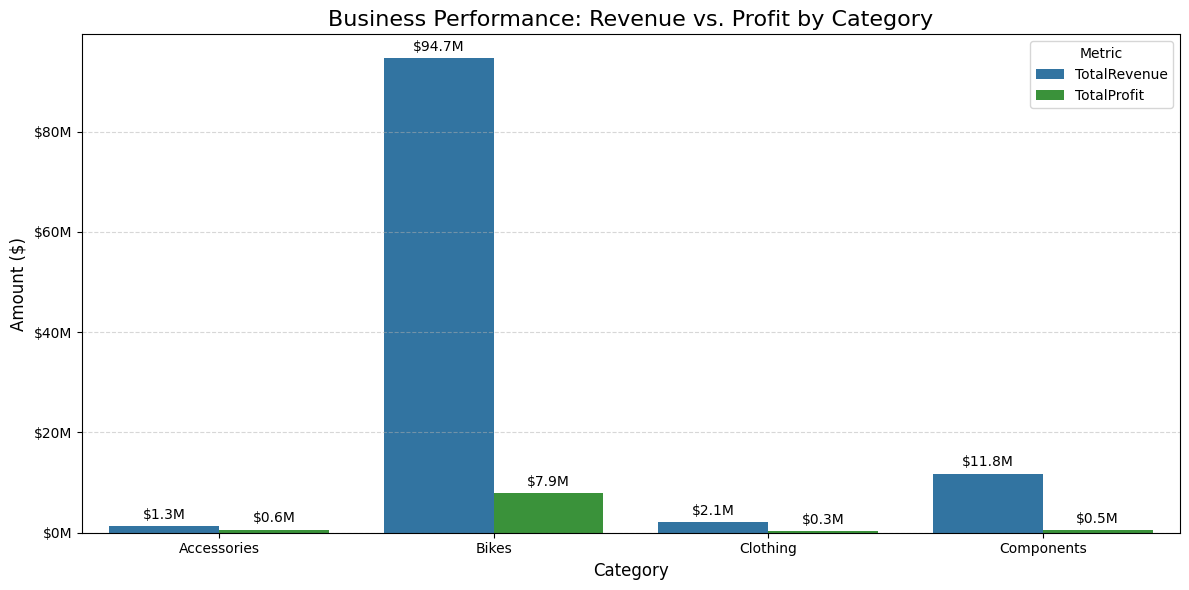

Category Efficiency Summary:


,CategoryName,TotalRevenue,TotalProfit,Margin %
1,Bikes,"$94,651,173","$7,936,394",8.4%
3,Components,"$11,802,593","$490,233",4.2%
2,Clothing,"$2,120,543","$308,882",14.6%
0,Accessories,"$1,272,073","$636,394",50.0%


In [16]:
# --- OPTION B: Final Visual (Grouped Bar Chart: Sales vs Profit) ---

# 1. PREPARE DATA
# Group by main Category to get the high-level view
df_cat = df_b1.groupby('CategoryName')[['TotalRevenue', 'TotalProfit']].sum().reset_index()

# Melt the data (Reshape) so we can plot "Revenue" and "Profit" side-by-side easily
df_melted = df_cat.melt(id_vars='CategoryName', var_name='Metric', value_name='Amount')

# 2. VISUALIZE
plt.figure(figsize=(12, 6))

# Create Grouped Bar Chart
ax = sns.barplot(
    data=df_melted,
    x='CategoryName',
    y='Amount',
    hue='Metric',
    palette=['#1f77b4', '#2ca02c'] # Blue for Revenue, Green for Profit
)

# 3. FORMATTING
plt.title('Business Performance: Revenue vs. Profit by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Fix Y-axis to show "Millions" (M)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}M'.format(y/1_000_000)))

# Add Data Labels (Optional but Professional)
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x/1_000_000:.1f}M', padding=3)

plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# 4. DATA OVERVIEW (Styled Table)
print("Category Efficiency Summary:")

# Create a fresh copy for the table and sort
df_table = df_cat.sort_values(by='TotalRevenue', ascending=False).copy()

# FIX: Explicitly calculate Margin % here to ensure it exists for the styler
df_table['Margin %'] = (df_table['TotalProfit'] / df_table['TotalRevenue']) * 100

# Display table with formatting and Green gradient for Margin
display(df_table.style.format({
    'TotalRevenue': '${:,.0f}',
    'TotalProfit': '${:,.0f}',
    'Margin %': '{:.1f}%'
}).background_gradient(subset=['Margin %'], cmap='Greens'))

### 💡 Category Efficiency Analysis

**Key Findings:**
* **The Revenue Engine (Bikes):** Although **Bikes** rank third in profit margin, they are the undisputed "Cash Cow" of the company. Generating nearly **$8M** in total profit (approx. **85%** of the company's total), this category shoulders the operational load for the entire business.
* **The Hidden Gem (Accessories):** **Accessories** are the most efficient category with an impressive **50% margin** and stand as the second-highest profit generator. 
    * *Strategy:* This indicates a prime opportunity for expansion. We should prioritize broadening the product range here, as every dollar sold yields the highest return.
* **Strategic Necessity (Components):** With a low margin of **4.2%**, **Components** generate minimal profit per unit. However, they are a strategic necessity to maintain our status as a comprehensive, end-to-end provider for our customers.
* **Optimization Target (Clothing):** **Clothing** currently contributes the lowest total profit, yet maintains a respectable **14% margin**. 
    * *Outlook:* As identified in the previous analysis, removing the specific "loser" products from this category should immediately improve its overall profitability and efficiency.